# NCSU GIS/MEA582: Geospatial Modeling and Analysis
# Section 3 - Analysis

## 3A - Global, zonal and neighborhood operations, map algebra

In [2]:
import sys
v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We are using Python 3.10.6


### Setup

For GRASS Location select nc_spm_08_grass7 (North Carolina, State Plane, meters) and for GRASS Mapset create a new mapset (called e.g. HW_map_algebra).

In [3]:
!grass -c -e ~/Documents/grassdata/nc_spm_08_grass7/HW_Analysis_3A

Creating new GRASS GIS mapset <HW_Analysis_3A>...


In [3]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys
import matplotlib.pyplot as plt
from PIL import Image


# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
session = gj.init("~/Documents/grassdata", "nc_spm_08_grass7", "HW_Analysis_3A")


Download all text files with color rules (see above) to the selected directory. Now you can use the commands from the assignment requiring the text file without the need to specify the full path to the file. 

In [ ]:
%%bash
curl -o "inputs/srtmneddiff_color.txt" "https://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/srtmneddiff_color.txt"

### Compute summaries

Compute areas for each category at two different resolutions.

**Are results equal? Explain in detail why (see also Lecture 1)**. Copy and paste the report from the output window or save the report in a text file: Output window > Save. Use fixed width font (e.g., Courier, Andale Mono in your report to preserve formatting). 

In [12]:
%%bash
g.region raster=landuse96_28m res=12 -ap
r.report landuse96_28m unit=c,h,p
g.region raster=landuse96_28m res=30 -ap
r.report landuse96_28m unit=c,h,p

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228528
south:      215016
west:       629976
east:       644976
nsres:      12
ewres:      12
rows:       1126
cols:       1250
cells:      1407500


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Oct  2 19:20:13 2022|
|-----------------------------------------------------------------------------|
|          north: 228528    east: 644976                                      |
|REGION    south: 215016    west: 629976                                      |
|          res:       12    res:      12                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: South-West Wake county: NC Land Use 1996 clipped (landuse96_28m in PERMA|
|-----------------------------------------------------------------------------|
|               Category Information    

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Oct  2 19:20:13 2022|
|-----------------------------------------------------------------------------|
|          north: 228540    east: 645000                                      |
|REGION    south: 215010    west: 629970                                      |
|          res:       30    res:      30                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: South-West Wake county: NC Land Use 1996 clipped (landuse96_28m in PERMA|
|-----------------------------------------------------------------------------|
|               Category Information    

Compute areas for each category of land use for each zipcode. \
**Compare `27601 Raleigh` with `27511 Cary`. Include only the relevant part of the table in your report.** 

In [13]:
!r.report zipcodes,landuse96_28m unit=h,p

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Oct  2 19:20:35 2022|
|-----------------------------------------------------------------------------|
|          north: 228540    east: 645000                                      |
|REGION    south: 215010    west: 629970                                      |
|          res:       30    res:      30                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAPS: South West Wake: Zipcode areas derived from vector m

Compute zonal statistics maps representing average slope for each basin.
Add legends using Add map elements in Map Display toolbar. Reminder: [d.out.file](https://grass.osgeo.org/grass76/manuals/d.out.file.html) means Save to graphics file for your report. 

In [4]:
%%bash
g.region raster=slope -p
r.stats.zonal base=basin_50K cover=slope method=average output=slope_avgbasin
r.colors slope_avgbasin color=gyr

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000


First pass
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output map
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <slope_avgbasin> set to 'gyr'


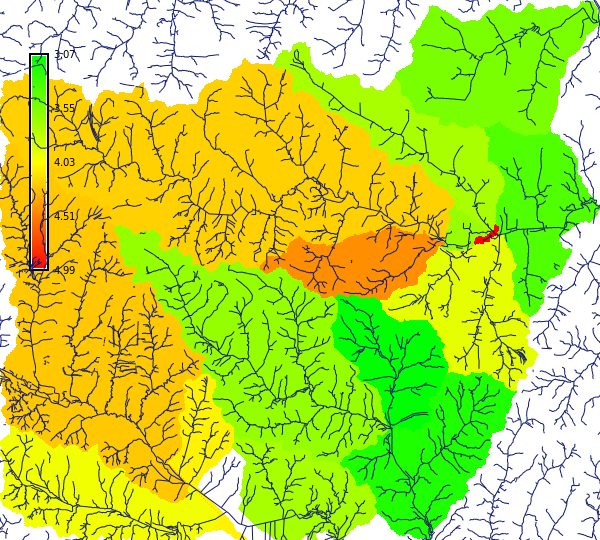

In [5]:
# Create Map instance
slope_avgbasin_map = gj.Map(filename="outputs/slope_avgbasin.png")
slope_avgbasin_map.d_rast(map="slope_avgbasin")
slope_avgbasin_map.d_legend(raster="slope_avgbasin", at=[90,50,5,8])
slope_avgbasin_map.d_vect(map="streams", color="15:25:110")

# Display map
slope_avgbasin_map.show()

Compute zonal statistics maps representing most common land use for each basin.

> To get the best result, make sure you use all the flags from the example below. 

In [6]:
%%bash
g.region raster=landuse96_28m -p
r.mode base=basin_50K cover=landuse96_28m output=landuse96_modebasin

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


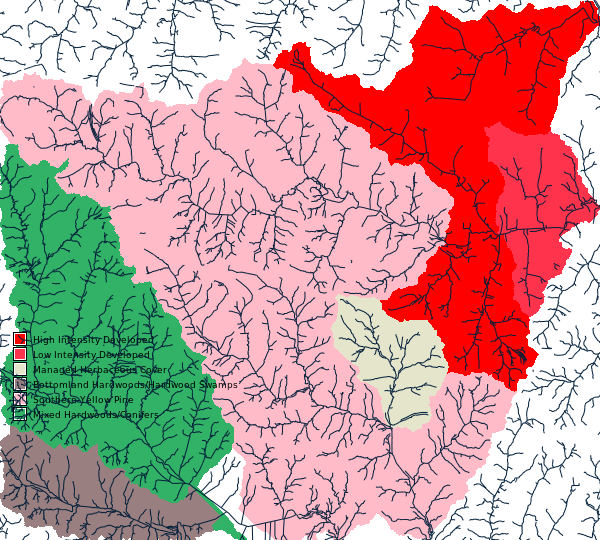

In [15]:
# Create Map instance
landuse96_modezip_map = gj.Map(filename="outputs/landuse96_modezip.png")
landuse96_modezip_map.d_rast(map="landuse96_modebasin")
landuse96_modezip_map.d_legend(raster="landuse96_modebasin", at=[40,20,2,5], flags="nfc")
landuse96_modezip_map.d_vect(map="streams")

# Display map
landuse96_modezip_map.show()

### Apply neighborhood operators

Use neighborhood operator to compute land use diversity map and create a map of locations with the most homogeneous (single category) landuse.
**Which land use covers the largest area with a single landuse category(most homogeneous areas)?**

 First, remove all previously added map layers from the Layer Manager, then compute and display the land use diversity map. Use map algebra to extract the single category areas and find out the area totals for each category using the report tool. Adjust the legend size and placement as needed using right click and mouse. 

In [ ]:
!r.info -g landuse96_28m

In [14]:
%%bash
g.region raster=landuse96_28m -p
r.neighbors landuse96_28m output=lu_divers method=diversity size=7


north=228527.25
south=215018.25
east=644971
west=629980
nsres=28.5
ewres=28.5
rows=474
cols=526
cells=249324
datatype=CELL
ncats=24
projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


In [16]:
!r.report lu_divers unit=p

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Oct  2 19:41:35 2022|
|-----------------------------------------------------------------------------|
|          north: 228527.25    east: 644971                                   |
|REGION    south: 215018.25    west: 629980                                   |
|          res:        28.5    res:    28.5                                   |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: 7x7 neighborhood: diversity of landuse96_28m (lu_dive

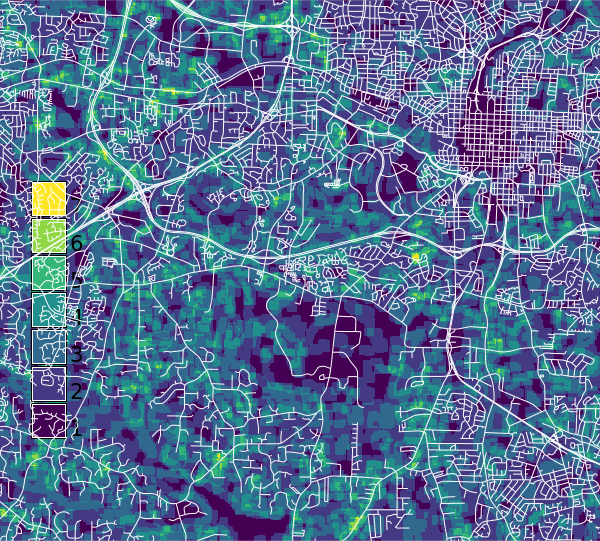

In [18]:
# Create Map instance
lu_diversity_map_map = gj.Map(filename="outputs/lu_diversity_map.png")
lu_diversity_map_map.d_rast(map="lu_divers")
lu_diversity_map_map.d_legend(raster="lu_divers", at=[70,15,5,10], flags="v")
lu_diversity_map_map.d_vect(map="streets_wake", co="white")

# Display map
lu_diversity_map_map.show()

In [19]:
%%bash
r.mapcalc "landuse_1cat = if(lu_divers == 1, landuse96_28m, null())"
r.colors landuse_1cat raster=landuse96_28m
r.category landuse_1cat raster=landuse96_28m
r.report landuse_1cat unit=h,p -n

Color table for raster map <landuse_1cat> set to 'landuse96_28m'
Category table for <landuse_1cat> set from <landuse96_28m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Oct  2 19:42:14 2022|
|-----------------------------------------------------------------------------|
|          north: 228527.25    east: 644971                                   |
|REGION    south: 215018.25    west: 629980                                   |
|          res:        28.5    res:    28.5                                   |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: South-West Wake county: NC Land Use 1996 clipped (landuse_1cat in HW_Ana|
|-----------------------------------------------------------------------------|
|                   Category Information

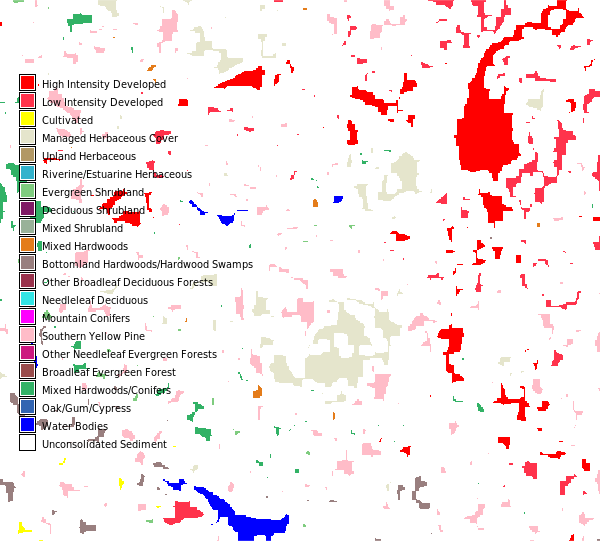

In [20]:
# Create Map instance
lu_signle_map = gj.Map(filename="outputs/lu_signle_map.png")
lu_signle_map.d_rast(map="landuse_1cat")
lu_signle_map.d_legend(raster="landuse_1cat", flags="c")

# Display map
lu_signle_map.show()

Visualy compare the SRTM elevation map "elev_srtm_30m" with lidar-based elevation map "elevation". Use neighborhood operator to smooth the SRTM elevation map and compare the summary statistical measures for the original and smoothed SRTM DEM. 
 
**How does the size of the neighborhood influence the result?** (You can test different sizes yourself.) 

In [25]:
!g.region raster=elev_srtm_30m -p
!r.colors elev_srtm_30m raster=elevation

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000
Color table for raster map <elev_srtm_30m> set to 'elevation'


projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


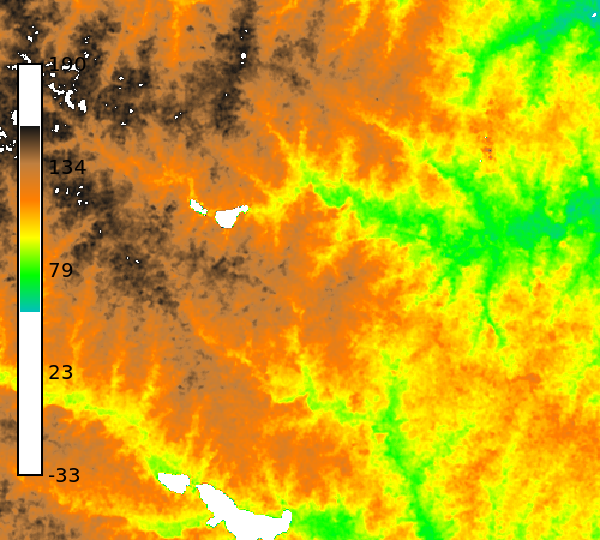

In [26]:
# Create Map instance
srtm_dem_original_map = gj.Map(filename="outputs/srtm_dem_original.png")
srtm_dem_original_map.d_rast(map="elevation")
srtm_dem_original_map.d_legend(raster="elevation")
srtm_dem_original_map.d_rast(map="elev_srtm_30m")
srtm_dem_original_map.d_legend(raster="elev_srtm_30m")

# Display map
srtm_dem_original_map.show()

In [29]:
%%bash
r.neighbors elev_srtm_30m output=elev_srtm30m_sm5 method=average size=5

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


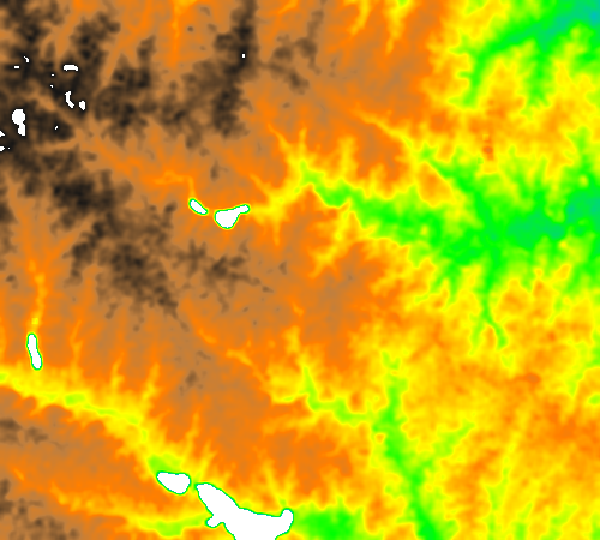

In [30]:
# Create Map instance
srtm_dem_smoothed_map = gj.Map(filename="outputs/srtm_dem_smoothed.png")
srtm_dem_original_map.d_rast(map="elev_srtm30m_sm5")

# Display map
srtm_dem_original_map.show()

In [31]:
!r.univar elev_srtm_30m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -32.6544
maximum: 189.818
range: 222.472
mean: 113.498
mean of absolute values: 113.534
standard deviation: 23.7183
variance: 562.558
variation coefficient: 20.8975 %
sum: 25537115.624415


In [32]:
!r.univar elev_srtm30m_sm5

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -4.52929
maximum: 160.353
range: 164.882
mean: 113.498
mean of absolute values: 113.5
standard deviation: 23.182
variance: 537.406
variation coefficient: 20.4251 %
sum: 25536959.4962114


### Patch multiple raster layers into a single raster

Patch raster tiles for lidar based, 6m res. DEM for Centennial Campus. 

In [35]:
%%bash
g.region raster=el_D793_6m,el_D783_6m,el_D782_6m,el_D792_6m -p
r.patch input=el_D793_6m,el_D783_6m,el_D782_6m,el_D792_6m output=elevlidD_6m
r.colors elevlidD_6m raster=elevation

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      225552.45109601
south:      219456.439
west:       633985.268
east:       640081.28009601
nsres:      6.0960121
ewres:      6.0960121
rows:       1000
cols:       1000
cells:      1000000


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <elevlidD_6m> set to 'elevation'


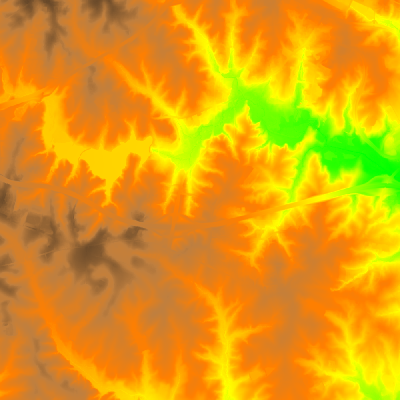

In [36]:
# Create Map instance
elevlidD_6m_map = gj.Map(filename="outputs/elevlidD_6m.png")
elevlidD_6m_map.d_rast(map="elevlidD_6m")

# Display map
elevlidD_6m_map.show()

### Map Algebra

See r.mapcalc manual page for syntax and functions. If you are getting en error when running r.mapcalc in GUI Console or the system command line, launch the GUI version from Layer Manager toolbar. 

#### NDVI

Compute Normalized Difference Vegetation Index (NDVI).

**Explain the difference between floating point and integer handling in ndvi1, ndvi2 and ndvi3 result.** 

Make sure to zoom into computational area after changing the region. 

In [37]:
%%bash
g.region raster=lsat7_2002_40 -p
r.mapcalc "ndvi1 = (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)"
r.info -r ndvi1

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228513
south:      214975.5
west:       629992.5
east:       645012
nsres:      28.5
ewres:      28.5
rows:       475
cols:       527
cells:      250325
min=0
max=0


In [38]:
%%bash
g.region raster=lsat7_2002_40 -p
r.mapcalc "ndvi2 = 1.0 * (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)"
r.info -r ndvi2

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228513
south:      214975.5
west:       629992.5
east:       645012
nsres:      28.5
ewres:      28.5
rows:       475
cols:       527
cells:      250325
min=-0.956521739130435
max=0.978723404255319


In [42]:
%%bash
g.region raster=lsat7_2002_40 -p
r.mapcalc "ndvi3 = float(lsat7_2002_40 - lsat7_2002_30) / float(lsat7_2002_40 + lsat7_2002_30)"
r.info -r ndvi3
r.colors ndvi3 color=ndvi

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228513
south:      214975.5
west:       629992.5
east:       645012
nsres:      28.5
ewres:      28.5
rows:       475
cols:       527
cells:      250325
min=-0.9565217
max=0.9787234


Color table for raster map <ndvi3> set to 'ndvi'


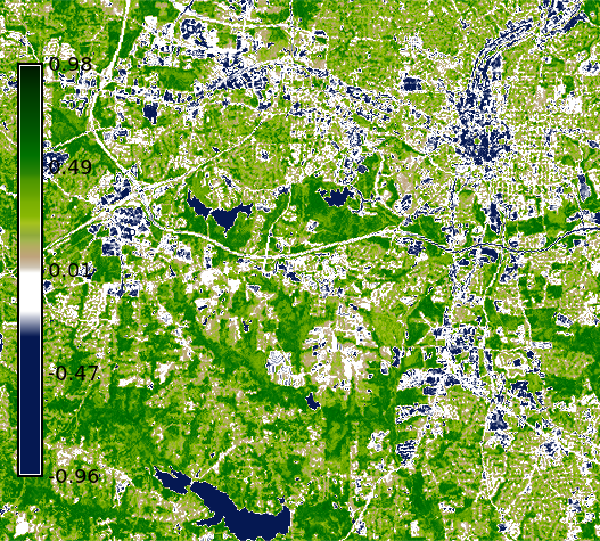

In [43]:
# Create Map instance
ndvi3_map = gj.Map(filename="outputs/ndvi3.png")
ndvi3_map.d_rast(map="ndvi3")
ndvi3_map.d_legend(raster="ndvi3")

# Display map
ndvi3_map.show()

Note that this is a simplified, map algebra example, for computing various vegetation indices in GRASS GIS, we would use the i.vi module after performing atmospheric corrections. 

### Difference between DEM and DSM

 Explore the difference between the SRTM DSM "elev_srtm_30m" and lidar-based NED DEM "elev_ned_30m". First, compute the map of elevation differences:

In [44]:
%%bash
g.region raster=elev_ned_30m -p
r.mapcalc "srtm_ned30_dif = elev_srtm_30m - elev_ned_30m"

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000


Find the range of differences and create a divergent color table to distinguish the negative and positive values: 

In [45]:
!r.info -r srtm_ned30_dif

min=-142.2435
max=86.19325


In [47]:
!r.colors srtm_ned30_dif rules=inputs/srtmneddiff_color.txt

Color table for raster map <srtm_ned30_dif> set to
'inputs/srtmneddiff_color.txt'


Zoom to computational region and switch off previous map layers. Display the difference map layer: 

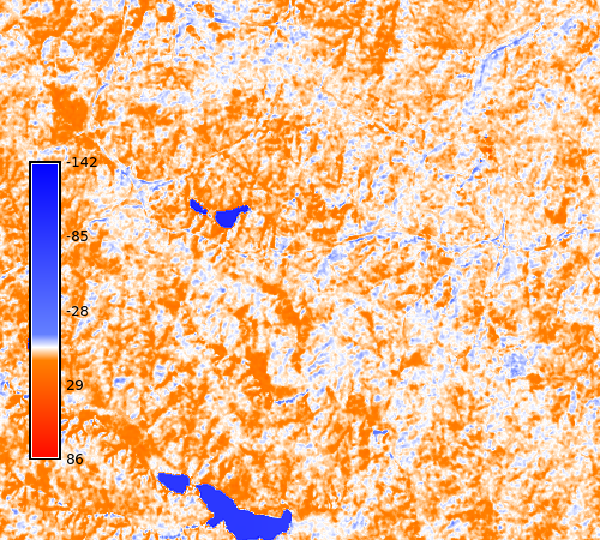

In [48]:
# Create Map instance
srtm_ned30_dif_map = gj.Map(filename="outputs/srtm_ned30_dif.png")
srtm_ned30_dif_map.d_rast(map="srtm_ned30_dif")
srtm_ned30_dif_map.d_legend(raster="srtm_ned30_dif", at=[70,15,5,10])

# Display map
srtm_ned30_dif_map.show()

In [49]:
%%bash
r.univar elev_srtm_30m
r.univar elev_ned_30m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -32.6544
maximum: 189.818
range: 222.472
mean: 113.498
mean of absolute values: 113.534
standard deviation: 23.7183
variance: 562.558
variation coefficient: 20.8975 %
sum: 25537115.624415


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: 55.1736
maximum: 156.387
range: 101.213
mean: 110.308
mean of absolute values: 110.308
standard deviation: 20.312
variance: 412.577
variation coefficient: 18.414 %
sum: 24819203.494606


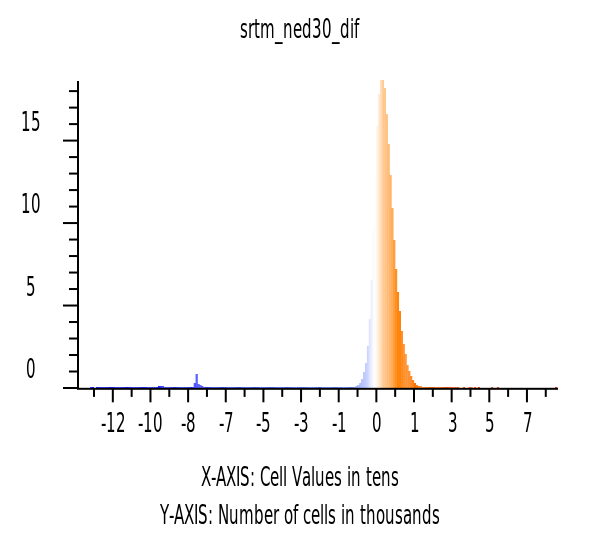

In [50]:
# Create Map instance
srtm_ned30_dif_hist = gj.Map(filename="outputs/srtm_ned30_dif_hist.png")
srtm_ned30_dif_hist.d_histogram(map="srtm_ned30_dif")

# Display historgram
srtm_ned30_dif_hist.show()

**Are the elevations in "elev_srtm_30m" mostly higher or mostly lower than in "elev_ned_30m"? Which result will you use to answer the above question - the "srtm_ned30_dif" map or the numbers provided by r.univar or the histogram? Are there any values in the maps used or generated in this section that are not realistic?**

### Working with if statements

Create map of urban areas (high density and low density class) with 0 class elsewhere. 

In [51]:
%%bash
g.region raster=landuse96_28m -p
r.mapcalc "urban1_30m = if(landuse96_28m == 1,1,0) + if(landuse96_28m == 2,2,0)"

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324


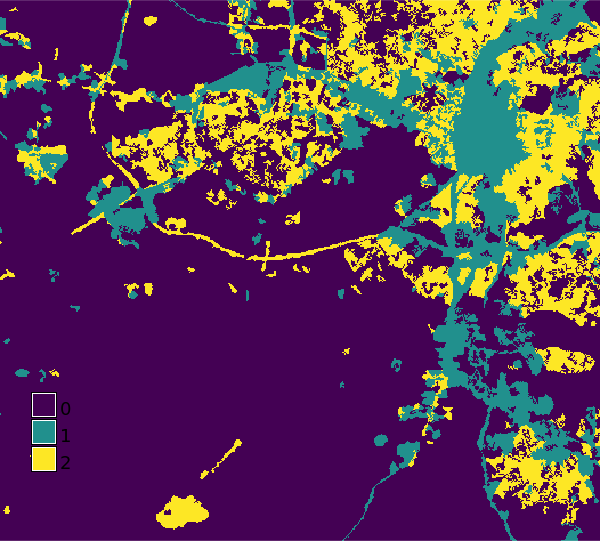

In [53]:
# Create Map instance
urban1_30m_map = gj.Map(filename="outputs/urban1_30m.png")
urban1_30m_map.d_rast(map="urban1_30m")
urban1_30m_map.d_legend(raster="urban1_30m", at=[10,30,5,8])

# Display map
urban1_30m_map.show()

Alternatively with logical 'or' operator and null elsewhere: 

In [54]:
!r.mapcalc "urban2_30m = if(landuse96_28m == 1 || landuse96_28m == 2,landuse96_28m,null())"

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


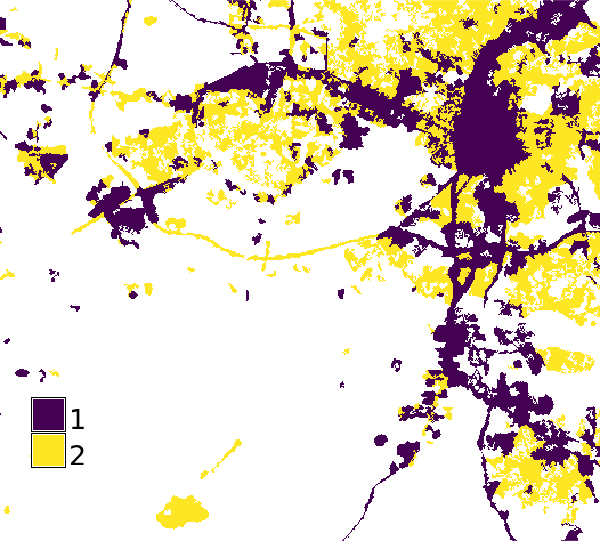

In [55]:
# Create Map instance
urban2_30m_map = gj.Map(filename="outputs/urban2_30m.png")
urban2_30m_map.d_rast(map="urban2_30m")
urban2_30m_map.d_legend(raster="urban2_30m", at=[10,30,5,8])

# Display map
urban2_30m_map.show()

### Handling null values

Create mask for low lying developed areas (e.g. vulnerable to flooding) with elevation between 60 and 100m and land use 1 or 2.

Set the region, display the input maps and create a MASK.

Before you start new computations, remove or switch off previous map layers in the Layer Manger. You may also zoom to computational region in Map Display once you set a new one. 

In [56]:
%%bash
g.region raster=elevation -p
r.mapcalc "low_elev_developed = if((elevation < 100 && elevation > 60) && (landuse96_28m == 1 || landuse96_28m == 2),1,null())"
r.mask raster=low_elev_developed

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000


All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.


Command [r.mask](https://grass.osgeo.org/grass76/manuals/r.mask.html) creates a raster map "MASK" in your mapset.

Remove ``"low_elev_developed"`` layer if it was added.

Display watersheds to see the mask effect: 

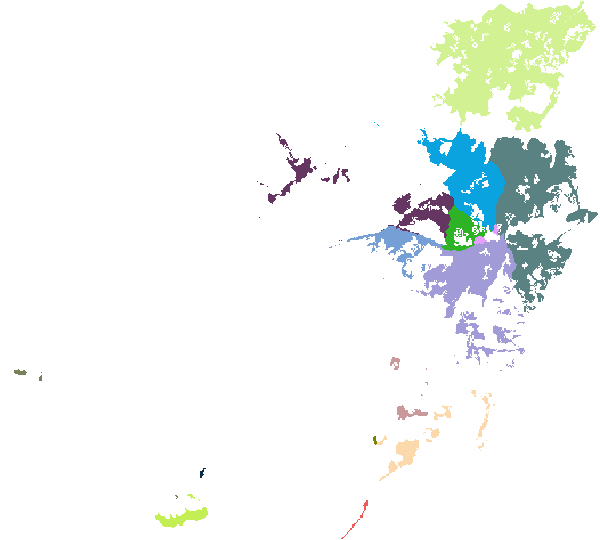

In [60]:
# Create Map instance
basin_masked_map = gj.Map(filename="outputs/basin_masked.png")
basin_masked_map.d_rast(map="basin_50K")

# Display map
basin_masked_map.show()

Disable mask, and display basin_50K again to show that the mask was removed. 

Raster MASK removed


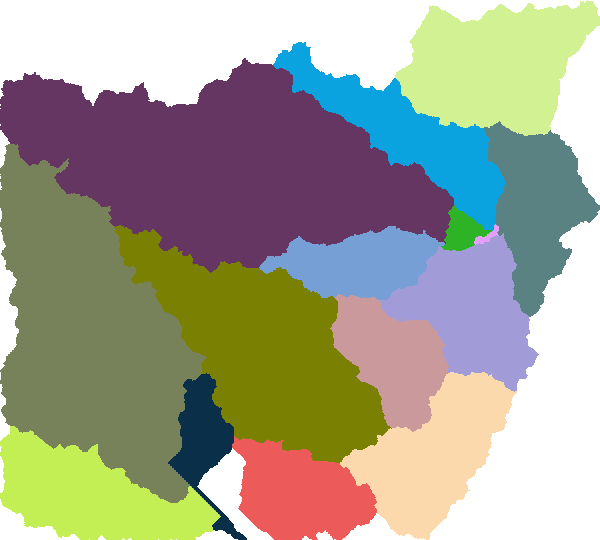

In [61]:
!r.mask -r

# Create Map instance
basin_50K_map = gj.Map(filename="outputs/basin_50K.png")
basin_50K_map.d_rast(map="basin_50K")

# Display map
basin_50K_map.show()

#### Using coordinates of moving window in map algebra

Replace section of SRTM DSM with NED DEM elevation.

**Try to explain how this r.mapcalc expression works.**

In [62]:
!r.mapcalc "elev_combined = if(y() < 224274. && x() > 637455., elevation, elev_srtm_30m)"

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


### Optional - various additional useful tasks

#### Tilted plane

Create a raster map representing tilted plane (e.g., geologic fault): 

In [63]:
%%bash
g.region rural_1m -p
r.mapcalc "tiltplane = 0.2*(0.1*row()+col())+50"
r.mapcalc "tiltpl_under = if(tiltplane < elev_lid792_1m + 2,tiltplane,null())"

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


View the elevation surface and subsurface plane in 3D. Switch off all layers in the layer manager except for elev_lid792_1m and tiltpl_under. Change display to 3D view, adjust viewing position to a view from South. Save an image for your report. 

#### Map subsets

Use map algebra to create map subsets.

Change region to the airphoto tile 792 and resolution 10m. Since we will work in different area, it is a good idea to remove all previously used map layers from Layers in the Layer Manager. 

In [64]:
!g.region raster=ortho_2001_t792_1m res=10 -ap

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      222510
south:      219450
west:       637030
east:       640090
nsres:      10
ewres:      10
rows:       306
cols:       306
cells:      93636


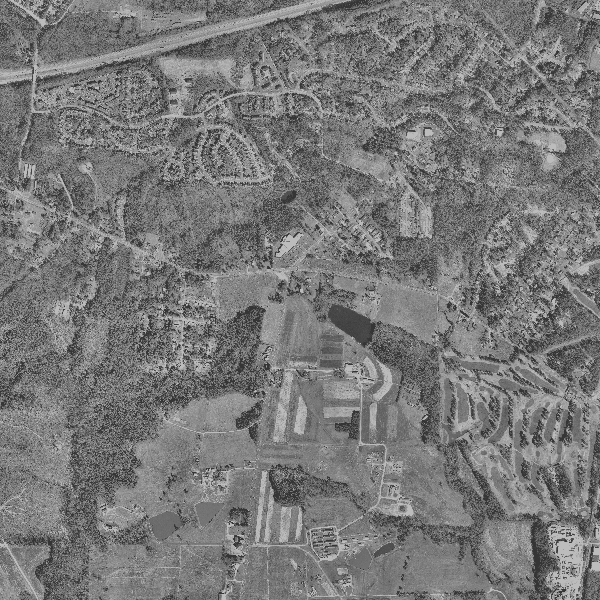

In [65]:
# Create Map instance
ortho_2001_t792_1m_map = gj.Map(filename="outputs/ortho_2001_t792_1m.png")
ortho_2001_t792_1m_map.d_rast(map="ortho_2001_t792_1m")

# Display map
ortho_2001_t792_1m_map.show()

Create a subset of the map elevation for this subregion. 

In [66]:
!r.mapcalc "elevation_792_10m = elevation"

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


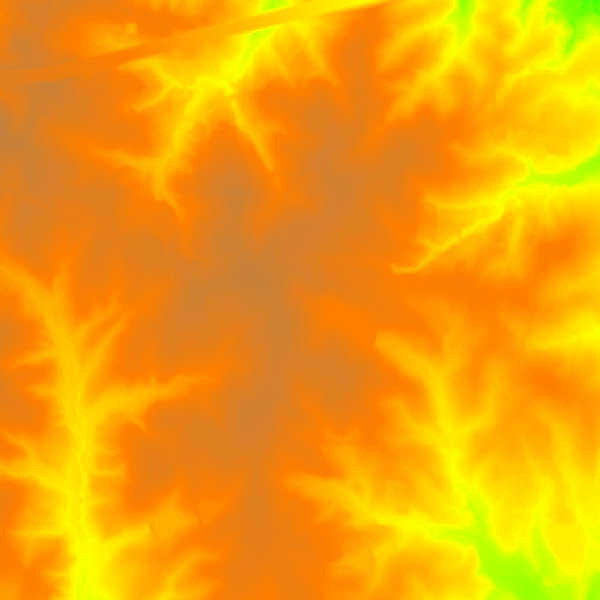

In [67]:
# Create Map instance
elevation_792_10m_map = gj.Map(filename="outputs/elevation_792_10m.png")
elevation_792_10m_map.d_rast(map="elevation_792_10m")

# Display map
elevation_792_10m_map.show()

Zoom out to see that it is a subset. 

#### Work with NULL and MASK

Set the mask and check its effect. 

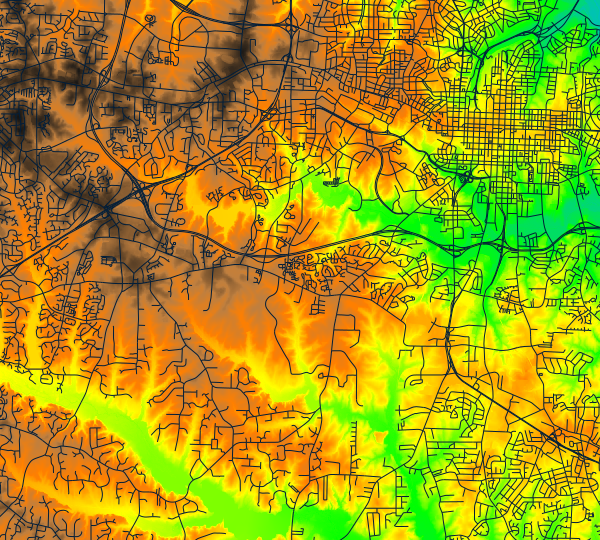

In [68]:
# Create Map instance
streets_wake_map = gj.Map()
streets_wake_map.d_rast(map="elevation")
streets_wake_map.d_vect(map="streets_wake")

# Display map
streets_wake_map.show()

All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.


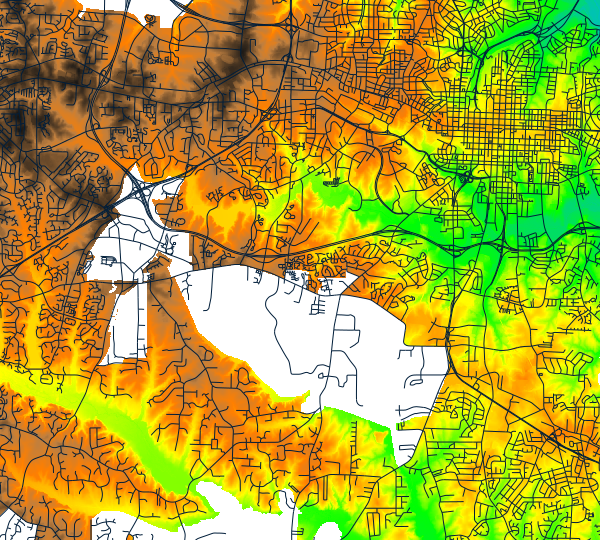

In [69]:
# Create Map instance
!r.mask raster=urban maskcats=55
streets_wake_map = gj.Map()
streets_wake_map.d_rast(map="elevation")
streets_wake_map.d_vect(map="streets_wake")

# Display map
streets_wake_map.show()

Remove mask: 

In [70]:
!r.mask -r

Raster MASK removed


#### Zonal statistics

First, set the computational region: 

In [71]:
!g.region raster=urban2_30m

Then, compute % area for each category in each zipcode. 

In [72]:
!r.stats -pl zipcodes,urban2_30m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
27511 CARY 1  0.59%
27511 CARY 2  0.39%
27511 CARY * no data 4.23%
27513 CARY 1  0.06%
27513 CARY 2  0.10%
27513 CARY * no data 0.85%
27518 CARY 1  0.43%
27518 CARY 2  0.10%
27518 CARY * no data 6.10%
27529 GARNER 1  1.66%
27529 GARNER 2  1.37%
27529 GARNER * no data 3.85%
27539 APEX 2  0.01%
27539 APEX * no data 1.21%
27601 RALEIGH 1  1.34%
27601 RALEIGH 2  0.82%
27601 RALEIGH * no data 0.09%
27603 RALEIGH 1  4.00%
27603 RALEIGH 2  1.85%
27603 RALEIGH * no data 15.34%
27604 RALEIGH 1  0.81%
27604 RALEIGH 2  0.86%
27604 RALEIGH * no data 0.66%
27605 RALEIGH 1  0.44%
27605 RALEIGH 2  0.49%
27605 RALEIGH * no data 0.24%
27606 RALEIGH 1  1.64%
27606 RALEIGH 2  3.45%
27606 RALEIGH * no data 27.60%
27607 RALEIGH 1  1.56%
27607 RALEIGH 2  2.02%
27607 RALEIGH * no data 6.72%
27608 RALEIGH 1  0.26%
27608 RALEIGH 2  1.26%
27608 RALEIGH * no data 0.66%
2761

#### Working with relative coordinates

Enter the expression on a single line without \
Again, it is a good idea to remove the previously used map layers before we start to work on a new task. 

In [73]:
%%bash
g.region raster=elev_srtm_30m -p
r.mapcalc "elev_srtm30m_smooth = (elev_srtm_30m[-1,-1]   \
           + elev_srtm_30m[-1,0] + elev_srtm_30m[-1,1] \
           + elev_srtm_30m[0,-1] + elev_srtm_30m[0,0]  \
           + elev_srtm_30m[0,1]  + elev_srtm_30m[1,-1] \
           + elev_srtm_30m[1,0]  + elev_srtm_30m[1,1])/9."

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000


Assign the resulting map the same color table as the original. Compare global statistics 

In [74]:
%%bash
r.colors elev_srtm30m_smooth raster=elev_srtm_30m
r.univar elev_srtm_30m
r.univar elev_srtm30m_smooth

Color table for raster map <elev_srtm30m_smooth> set to 'elev_srtm_30m'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -32.6544
maximum: 189.818
range: 222.472
mean: 113.498
mean of absolute values: 113.534
standard deviation: 23.7183
variance: 562.558
variation coefficient: 20.8975 %
sum: 25537115.624415


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 225000
total null cells: 1896

Of the non-null cells:
----------------------
n: 223104
minimum: -10.1891
maximum: 161.312
range: 171.501
mean: 113.531
mean of absolute values: 113.537
standard deviation: 23.3922
variance: 547.194
variation coefficient: 20.6042 %
sum: 25329229.8749284


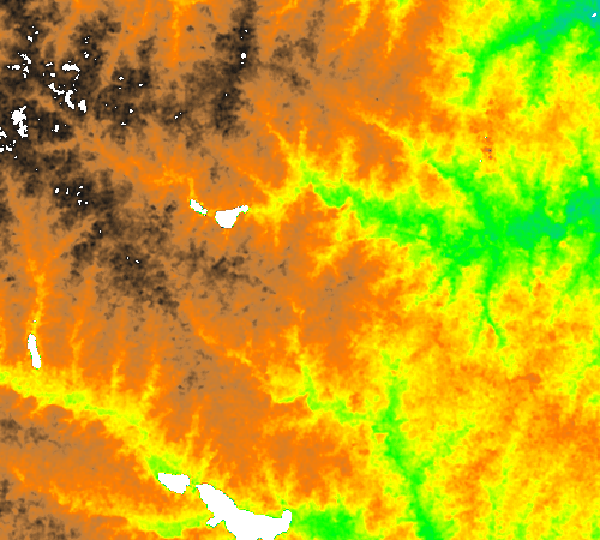

In [75]:
# Create Map instance
elev_srtm_30m_map = gj.Map()
elev_srtm_30m_map.d_rast(map="elev_srtm_30m")
# Display map
elev_srtm_30m_map.show()

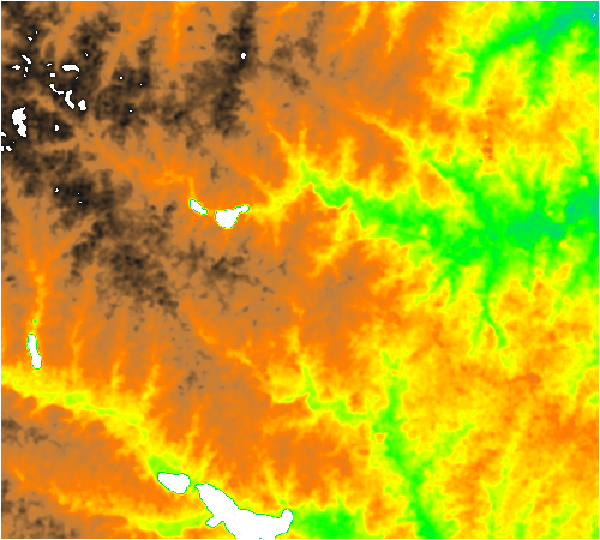

In [76]:
# Create Map instance
elev_srtm30m_smooth_map = gj.Map()
elev_srtm30m_smooth_map.d_rast(map="elev_srtm30m_smooth")
# Display map
elev_srtm30m_smooth_map.show()